In [1]:
#Get all packages needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as ma

In [2]:
df = pd.read_csv("data_customer_demographics.csv")
df.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'AGE'],
      dtype='object')

In [3]:
df.shape

(3994, 18)

In [4]:
df.isna().sum()

customer_id                            0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
AGE                                    0
dtype: int64

In [5]:
#Delete the Age cell where AGE > 100
df.AGE[df.AGE>100]=np.NaN

<ipython-input-5-495df5f38025>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.AGE[df.AGE>100]=np.NaN


In [6]:
df.isna().sum()

customer_id                            0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
AGE                                    1
dtype: int64

In [7]:
df.shape

(3994, 18)

In [8]:
df = df[df["AGE"].notna()]

In [9]:
df.isna().sum()

customer_id                            0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
AGE                                    0
dtype: int64

In [10]:
df.shape

(3993, 18)

In [11]:
#Convert AGE into integer 
df.AGE = df.AGE.astype(int)

In [12]:
df.AGE.dtype

dtype('int32')

In [13]:
#Conver AGE into groups 18~27,28~37,38~47,48~57, 58~67, 68~77,78~88 
for i in df["AGE"]:
    if i>17 and i<28:
        df["AGE"].replace([i], "18~27", inplace = True)  
    elif i>27 and i<38:  
        df["AGE"].replace([i], "28~37", inplace = True)
    elif i>37 and i<48:
        df["AGE"].replace([i], "38~47", inplace = True)
    elif i>47 and i<58:
        df["AGE"].replace([i], "48~57", inplace = True)
    elif i>57 and i<68:
        df["AGE"].replace([i], "58~67", inplace= True)
    elif i>67 and i<78:
        df["AGE"].replace([i], "68~77", inplace = True)
    else:
        df["AGE"].replace([i], "78~88", inplace = True)
        
        

In [14]:
df.AGE.value_counts()

38~47    1357
48~57     717
28~37     677
18~27     647
58~67     589
78~88       3
68~77       3
Name: AGE, dtype: int64

In [15]:
# The total amount of the purchases made in the past 3 years by group of gender 
gender_rel_purchases = df.groupby("gender")["past_3_years_bike_related_purchases"].sum()
gender_rel_purchases

gender
Female    98149
Male      93288
U          3659
Name: past_3_years_bike_related_purchases, dtype: int64

In [16]:
gender_percent = []
for i in gender_rel_purchases:
    gender_percent.append(i/gender_rel_purchases.sum())
gender_percent    

[0.5030805347111166, 0.47816459589125354, 0.018754869397629884]

In [17]:
gender_percent = np.array(gender_percent)
gender_percent = gender_percent.round(3)
gender_percent

array([0.503, 0.478, 0.019])

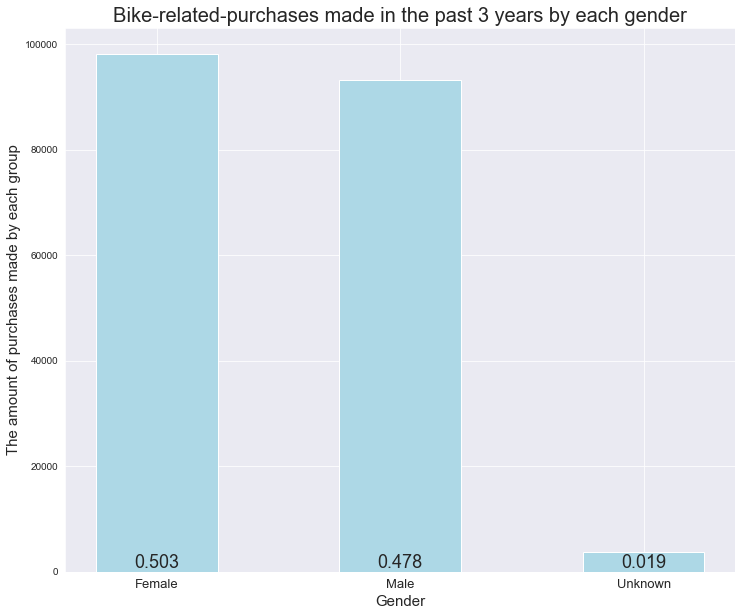

In [49]:
sns.set_style("darkgrid")
gender_per = [0.503, 0.478, 0.019]
x1 = np.arange(3)
fig1, ax1 = plt.subplots(figsize = (12,10))
ax1.set_title("Bike-related-purchases made in the past 3 years by each gender", size = 20)
ax1.set_xlabel("Gender", size = 15)
ax1.set_ylabel("The amount of purchases made by each group", size = 15)
plt.bar(x1,gender_rel_purchases, width = 0.5, color="lightblue")
for i in range(len(gender_percent)):
    plt.text(x = i,
             y = gender_percent[i],
             s = gender_percent[i],
             ha = "center",
             va = "bottom",
             size = 18)

plt.xticks(x1,("Female", "Male", "Unknown"), rotation = 0, size = 13); 

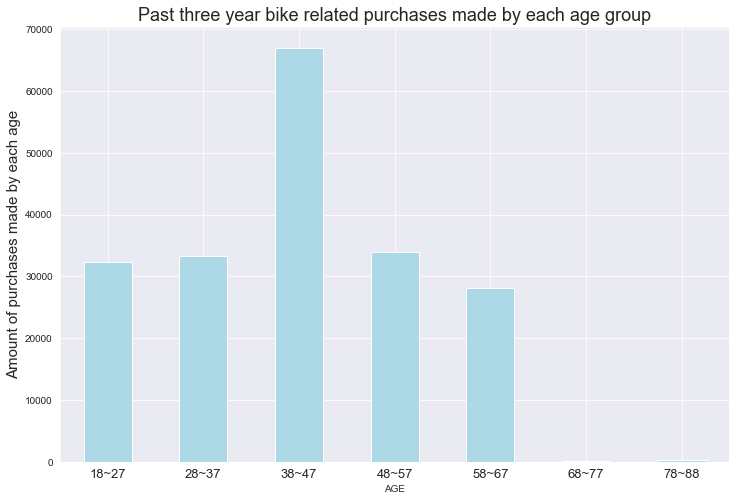

In [56]:
#Purchases acccording to the age
age_related_buys = df.groupby('AGE')['past_3_years_bike_related_purchases'].sum()
age_related_buys.plot(figsize = (12,8),
                      color = "lightblue",
                      kind = "bar")
plt.title("Past three year bike related purchases made by each age group", size = 18)
plt.ylabel("Amount of purchases made by each age", size = 15);
plt.xticks(rotation = 0, size = 13);

In [57]:
#Check for the unique category 
df["job_industry_category"].value_counts()

Manufacturing         959
Financial Services    925
Health                719
Retail                432
Property              319
IT                    270
Entertainment         158
Argiculture           129
Telecommunications     82
Name: job_industry_category, dtype: int64

In [58]:
cat_value = df["job_industry_category"].value_counts()
cat_value

Manufacturing         959
Financial Services    925
Health                719
Retail                432
Property              319
IT                    270
Entertainment         158
Argiculture           129
Telecommunications     82
Name: job_industry_category, dtype: int64

In [59]:
cat_value = np.array(cat_value)
cat_value

array([959, 925, 719, 432, 319, 270, 158, 129,  82], dtype=int64)

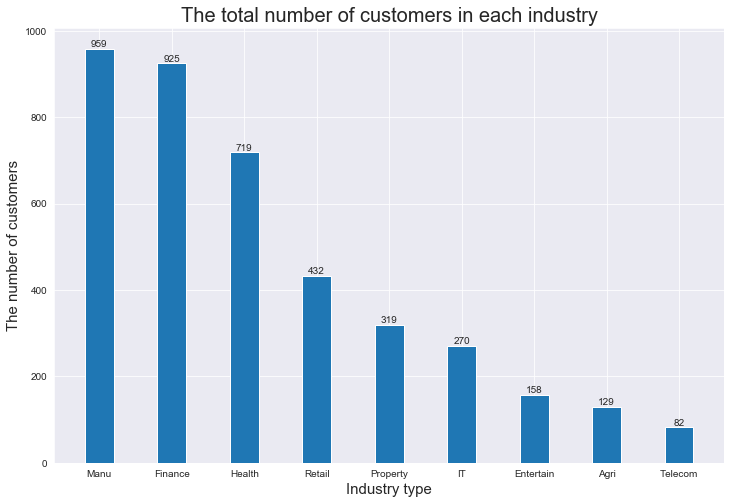

In [64]:
# The total number of customers in each industry
x3 = np.arange(9)
fig3, ax3 = plt.subplots(figsize = (12,8))
ax3.set_ylabel('Number of people')
plt.bar(x3, cat_value, width = 0.4)
for i in range(len(cat_value)):
    plt.text(x = i, y = cat_value[i]+0.1, s = cat_value[i], size = 10, ha = "center", va = "bottom" )

plt.xticks(x3, ("Manu", "Finance", "Health", "Retail", "Property", "IT", "Entertain", "Agri", "Telecom"));
plt.title("The total number of customers in each industry", size =20);
plt.xlabel("Industry type", size =15)
plt.ylabel("The number of customers", size = 15);

In [65]:
df.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'AGE', 'Affluent Customer', 'High Net Worth',
       'Mass Customer'],
      dtype='object')

In [66]:
df.shape

(3993, 21)

In [67]:
s = pd.get_dummies(df["wealth_segment"])

In [70]:
df.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'AGE', 'Affluent Customer', 'High Net Worth',
       'Mass Customer'],
      dtype='object')

In [71]:
#get the value of wealth segment according to the age
age_wealth_seg = df.groupby("AGE")["Affluent Customer",'High Net Worth','Mass Customer'].sum()
age_wealth_seg.head(7)

<ipython-input-71-36f0c0d8bba1>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_wealth_seg = df.groupby("AGE")["Affluent Customer",'High Net Worth','Mass Customer'].sum()


,Affluent Customer,High Net Worth,Mass Customer
AGE,,,
18~27,174.0,160.0,313.0
28~37,158.0,173.0,346.0
38~47,326.0,354.0,677.0
48~57,179.0,184.0,354.0
58~67,138.0,148.0,303.0
68~77,1.0,1.0,1.0
78~88,1.0,0.0,2.0


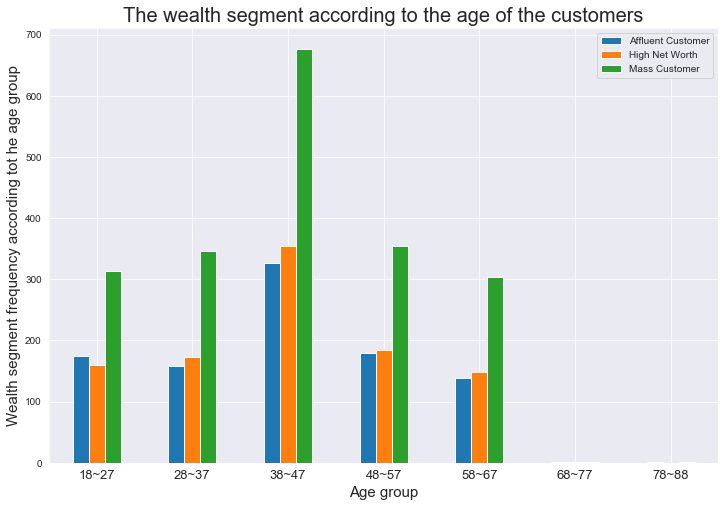

In [81]:
age_wealth_seg.plot(figsize =(12,8),
                    kind = "bar")
plt.title("The wealth segment according to the age of the customers", size =20, loc = "center")
plt.ylabel("Wealth segment frequency according tot he age group", size = 15)
plt.xlabel("Age group", size = 15);
plt.xticks(rotation = 0, size=13);

In [82]:
#Checking out the distribution of the "state" dataset
df.state.value_counts()

NSW    2137
VIC    1020
QLD     836
Name: state, dtype: int64

In [83]:
# Grouping states according to the wealth segment(finding out which state has higher proportion of wealthy customers) 
wealth_seg_state = df.groupby("state")["Affluent Customer",'High Net Worth','Mass Customer'].sum()
wealth_seg_state

<ipython-input-83-8122887575b0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wealth_seg_state = df.groupby("state")["Affluent Customer",'High Net Worth','Mass Customer'].sum()


,Affluent Customer,High Net Worth,Mass Customer
state,,,
NSW,522.0,549.0,1066.0
QLD,212.0,211.0,413.0
VIC,243.0,260.0,517.0


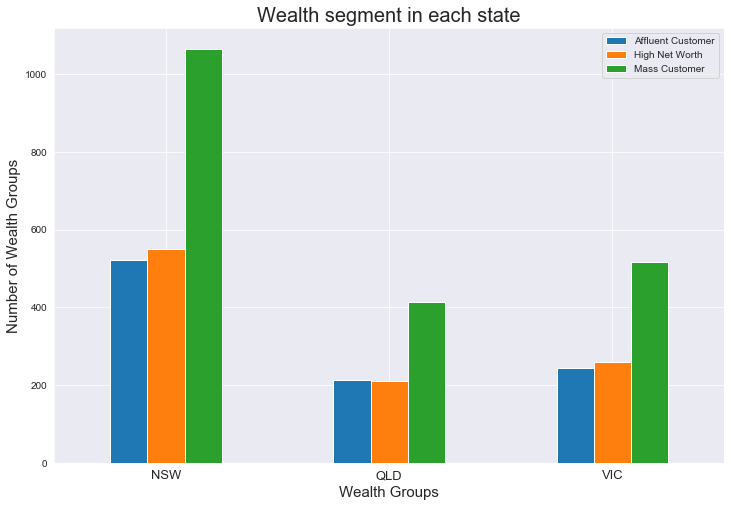

In [84]:
wealth_seg_state.plot(figsize = (12,8),
                      kind = "bar")

plt.title("Wealth segment in each state", size = 20)
plt.ylabel("Number of Wealth Groups", size = 15)
plt.xlabel("Wealth Groups", size = 15);
plt.legend();
plt.xticks(rotation = 0, size = 13);

In [85]:
df.columns 

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'AGE', 'Affluent Customer', 'High Net Worth',
       'Mass Customer'],
      dtype='object')

In [86]:
# checking the which wealth segment made  more bike related purchases in the past 3 years
purchases_made_wealth_seg = df.groupby("wealth_segment")["past_3_years_bike_related_purchases"].sum()
purchases_made_wealth_seg

wealth_segment
Affluent Customer    47681
High Net Worth       48238
Mass Customer        99177
Name: past_3_years_bike_related_purchases, dtype: int64

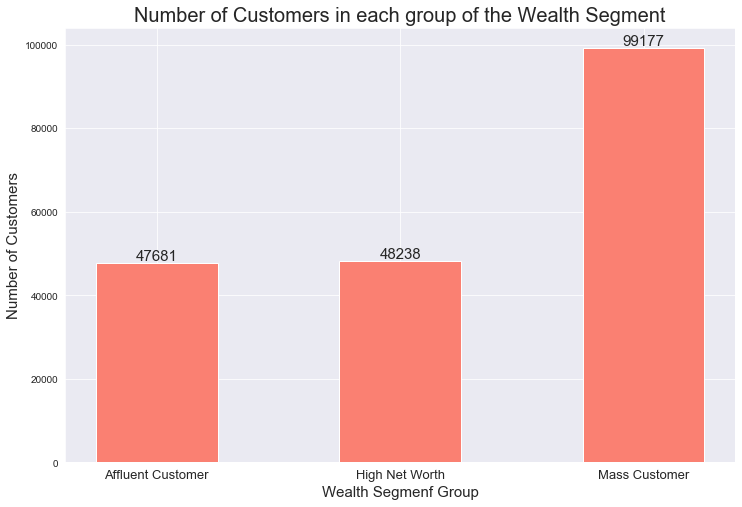

In [90]:
wealth_seg_value = [47681, 48238, 99177]
x5 = np.arange(3)
fig5, ax5 = plt.subplots(figsize = (12,8))
plt.ylabel("Number of Customers", size = 15, ha = "center")
plt.xlabel("Wealth Segmenf Group", size = 15, ha = "center")
plt.title("Number of Customers in each group of the Wealth Segment", size = 20)
plt.bar(x5,wealth_seg_value, width = 0.5, color = "salmon")
for i in range(len(wealth_seg_value)):
    plt.text(x = i, y = wealth_seg_value[i]+0.1, s = wealth_seg_value[i], size = 15, ha = "center", va = "bottom" )
plt.xticks(x5, ('Affluent Customer', 'High Net Worth',
       'Mass Customer'), rotation = 0, size = 13);